# custom-svm
Project for the **Combinatorial Decision Making and Optimization** course - Master in AI, *Alma Mater Studiorum*
#### Credits:
 - Mattia Orlandi
 - Lorenzo Mario Amorosa

Import the required libraries, in particular the custom implementation of SVM contained in the `svm.py` 
module and the dataset generator (`sample_data_generator.py`).  
Set some useful constants, like the random state `RND`, the number of samples `N_SAMP` 
and the number of features `N_FEAT`.

In [1]:
from svm import SVM
from data.sample_data_generator import *
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

RND = 42
N_SAMP = 100
N_FEAT = 2

Define a useful function which, given a `SVM` object, the training and the test sets, 
performs the following operations:
- `SVM.fit(...)` on the training set;
- `SVM.predict(...)` on the test set;
- computes the accuracy score;
- plots the result (only for our svm).

In [2]:
def fit_and_predict(svm: SVM,
                    X_train: np.ndarray,
                    X_test: np.ndarray,
                    y_train: np.ndarray,
                    y_test: np.ndarray,
                    is_custom: bool):
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_train)
    print('Accuracy on the training set: {0:.2f}%'.format(accuracy_score(y_train, y_pred) * 100))
    y_pred = svm.predict(X_test)
    print('Accuracy on the test set: {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    if is_custom:
        svm.plot2D(np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)))

Test the SVM on a linearly separable dataset.

4 support vectors found out of 75 data points:
1) X: [0.634 0.536]	y: 1
2) X: [0.887 0.78 ]	y: -1
3) X: [0.229 0.077]	y: -1
4) X: [0.73  0.638]	y: 1
Bias of the hyper-plane: 11.938
Weights of the hyper-plane: [-82.665  77.419]
Accuracy on the training set: 100.00%
Accuracy on the test set: 88.00%


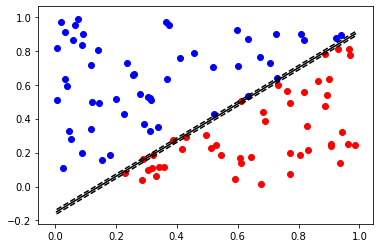

In [11]:
X_train, X_test, y_train, y_test = linear_data_generator(n_samples=N_SAMP,
                                                         n_features=N_FEAT,
                                                         random_state=RND)
svm = SVM()
fit_and_predict(svm, X_train, X_test, y_train, y_test, True)

Test the SVM on the same dataset, but fitting only on the support vectors found.

4 support vectors found out of 4 data points:
1) X: [0.634 0.536]	y: 1
2) X: [0.887 0.78 ]	y: -1
3) X: [0.229 0.077]	y: -1
4) X: [0.73  0.638]	y: 1
Bias of the hyper-plane: 11.938
Weights of the hyper-plane: [-82.665  77.419]
Accuracy on the training set: 100.00%
Accuracy on the test set: 88.00%


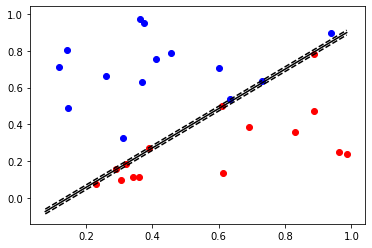

In [12]:
X_train, y_train = svm.sv_X, svm.sv_y
svm = SVM()
fit_and_predict(svm, X_train, X_test, y_train, y_test, True)

Test the SVM on a non-linear separable dataset.

13 support vectors found out of 75 data points:
1) X: [ 0.922 -0.084]	y: -1
2) X: [0.36 0.89]	y: -1
3) X: [ 0.282 -0.81 ]	y: -1
4) X: [ 0.683 -0.566]	y: -1
5) X: [ 0.451 -0.502]	y: 1
6) X: [0.414 0.499]	y: 1
7) X: [-0.423  0.568]	y: 1
8) X: [-0.448 -0.131]	y: 1
9) X: [-0.261  0.924]	y: -1
10) X: [-0.347 -0.862]	y: -1
11) X: [-0.643  0.514]	y: -1
12) X: [ 0.506 -0.698]	y: -1
13) X: [0.874 0.175]	y: -1
Bias of the hyper-plane: -1.735
Accuracy on the training set: 100.00%
Accuracy on the test set: 96.00%


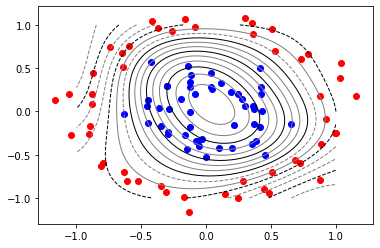

In [13]:
X_train, X_test, y_train, y_test = non_linear_data_generator(n_samples=N_SAMP,
                                                             random_state=RND)
svm = SVM(kernel='rbf')
fit_and_predict(svm, X_train, X_test, y_train, y_test, True)

Test the SVM on the same dataset, but fitting only on the support vectors found.

8 support vectors found out of 13 data points:
1) X: [ 0.282 -0.81 ]	y: -1
2) X: [ 0.683 -0.566]	y: -1
3) X: [ 0.451 -0.502]	y: 1
4) X: [-0.423  0.568]	y: 1
5) X: [-0.261  0.924]	y: -1
6) X: [-0.643  0.514]	y: -1
7) X: [ 0.506 -0.698]	y: -1
8) X: [0.874 0.175]	y: -1
Bias of the hyper-plane: -2.210
Accuracy on the training set: 100.00%
Accuracy on the test set: 96.00%


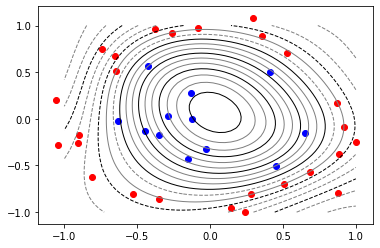

In [14]:
X_train, y_train = svm.sv_X, svm.sv_y
svm = SVM(kernel='rbf')
fit_and_predict(svm, X_train, X_test, y_train, y_test, True)

The following SVM models are tested on a dataset constructed by simulating measurements of distances between sensors and IoT devices in a building.

The task of the classifier is to predict the room in which the device is located given the input of the sensors.

In the following figure, it is given a floor with 2 rooms (blue and red) and 5 sensors.

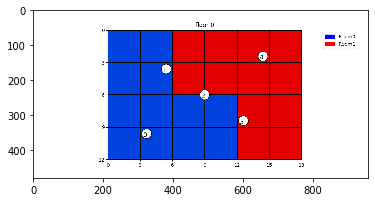

In [6]:
img = plt.imread('data/data_png/2_rooms.png')
plt.imshow(img)
plt.show()

Utility function to read and process the dataset

In [7]:
def read_dataset(f_name: str):
    X_raw = []
    y_raw = []
    with open(f_name, "r") as file:
        for line in file:
            features = line.split(',')[:-1]
            X_raw.append(features)
            y_raw.append(line.split(',')[-1])
    X = np.array(X_raw).astype(np.float)
    y_tmp = np.array(y_raw).astype(np.float)
    y = np.fromiter((-1 if yi == 0 else 1 for yi in y_tmp), y_tmp.dtype)
    return train_test_split(X, y, test_size=0.2, random_state=RND)

Test the SVM on a dataset sampled from the previous room.

In [8]:
f_name ="data/data_2_rooms.txt"
X_train, X_test, y_train, y_test = read_dataset(f_name)
svm = SVM(kernel="rbf")
fit_and_predict(svm, X_train, X_test, y_train, y_test, True)

41 support vectors found out of 800 data points:
1) X: [0.113 0.188 7.896 6.334 1.476]	y: 1.0
2) X: [0.005 7.303 0.428 0.055 0.   ]	y: -1.0
3) X: [ 0.049 10.118  0.483  0.098  0.147]	y: 1.0
4) X: [ 0.156  0.046  0.64  18.746  0.003]	y: -1.0
5) X: [0.227 0.052 0.31  1.101 0.032]	y: -1.0
6) X: [ 0.523  2.078 50.     0.819  0.167]	y: -1.0
7) X: [0.018 1.42  0.201 0.014 0.049]	y: 1.0
8) X: [ 0.202 29.573  2.001  0.058  0.064]	y: 1.0
9) X: [ 0.606 16.052 12.902  0.166  0.13 ]	y: 1.0
10) X: [0.102 3.405 0.29  0.094 0.045]	y: 1.0
11) X: [0.048 0.051 0.    0.449 0.141]	y: 1.0
12) X: [ 0.     0.092  0.433 46.922  0.184]	y: 1.0
13) X: [ 0.245  0.537 50.     2.089  0.529]	y: 1.0
14) X: [ 0.     0.069  0.468 50.     0.024]	y: 1.0
15) X: [ 0.428 16.658  2.593  0.154  0.005]	y: -1.0
16) X: [ 0.108  0.113  1.859 50.     0.226]	y: 1.0
17) X: [1.598 6.387 4.58  0.239 0.07 ]	y: -1.0
18) X: [ 0.046  0.137  5.55  16.912  1.057]	y: -1.0
19) X: [ 0.155  0.154  1.318 50.     0.128]	y: -1.0
20) X: [ 0.507 50.

Compare the previous result with `sklearn.SVC`

In [9]:
f_name ="data/data_2_rooms.txt"
X_train, X_test, y_train, y_test = read_dataset(f_name)
svm = SVC(kernel="rbf")
fit_and_predict(svm, X_train, X_test, y_train, y_test, False)

Accuracy on the training set: 85.88%
Accuracy on the test set: 86.00%
